<a href="https://colab.research.google.com/github/eldend/kh/blob/main/4_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv_data')

In [ ]:
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [ ]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
ss = StandardScaler()
ss.fit(train_input)

StandardScaler()

In [ ]:
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [ ]:
from sklearn.linear_model import SGDClassifier

In [ ]:
sc = SGDClassifier(loss='log_loss', max_iter=10, random_state=42)
#max_iter(에포크 반복횟수 10으로 제한)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))
print(sc.coef_, sc.intercept_)

0.773109243697479
0.775
[[ -6.30108425  -0.59572877   7.88184358  28.50725844  -4.57524048]
 [-28.03749856 -13.01864174 -24.28354218  37.56556413  -4.99369156]
 [ -3.93249682  17.77205773 -49.51418932 -27.49911662  47.56263543]
 [  4.33466212  15.13001677  12.21938065 -24.53199057  -0.61293767]
 [-47.59621032 -19.71411219  21.76713851   1.91422973  21.0069932 ]
 [  7.03785146   6.44153908   8.0385569  -19.38693385 -24.29711606]
 [-19.43087985  -7.13217691  -2.58092476   0.7050211   11.6470326 ]] [-21.30540045 -43.12497336 -14.70492136 -30.38561783 -17.12077509
 -62.17137674 -25.16714949]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [ ]:
sc.partial_fit(train_scaled, train_target)
#(1에포크씩 이어서 훈련)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))
print(sc.coef_, sc.intercept_)
#에포크 횟수가 올라갈 수록 정확도가 올라가지만 적합한 에포크 횟수를 찾아야함(과대/과소 적합문제 발생)
#조기종료 과대적합이 되기 전에 훈련을 종료

0.8151260504201681
0.85
[[ -7.0396623   -1.28306727   7.25597022  28.71657394  -4.89295713]
 [-29.21415756 -13.27730792 -24.60702862  39.32183252  -5.43223029]
 [ -7.70639873  19.82722028 -48.16406571 -20.48461949  49.32818113]
 [  4.03865784  14.81324244  12.04123747 -23.66013502  -0.62003203]
 [-43.33340095 -17.41512258  25.78661142   7.41327062  23.73358558]
 [  4.94980036   2.65174709   4.67416818 -24.63858538 -30.84761097]
 [-16.86592394  -6.43699427  -1.63347156   3.2042301   16.59860137]] [-18.84376871 -37.74597163 -21.19032367 -29.70258666 -17.90870906
 -61.7776268  -17.63177127]


In [ ]:
import numpy as np

sc = SGDClassifier(loss='log_loss', random_state=42)

train_score = []
test_score = []

classes = np.unique(train_target)

In [ ]:
for _ in range(0, 300):
    sc.partial_fit(train_scaled, train_target, classes=classes)
    #클래스를 지정해야함
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

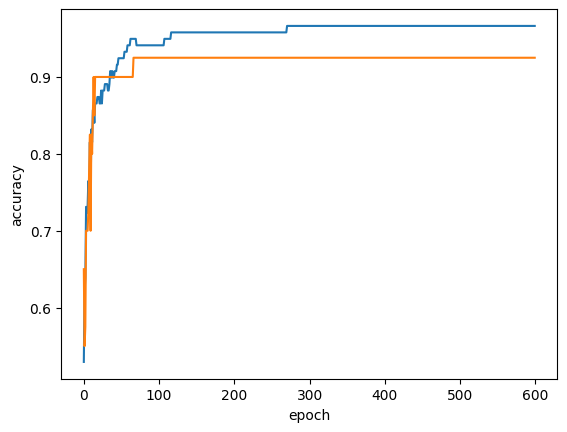

In [ ]:
import matplotlib.pyplot as plt

plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()
#적합한 에포크는 100정도가 적합
#70에서는 과소적합/ 100이상에서는 과대적합
#두 그래프의 간극이 적은 값을 선택해야함
#tol매개변수는 두 그래프간의 차이가 5번 정도 없을 경우 종료하는 매개변수

In [ ]:
sc = SGDClassifier(loss='log_loss', max_iter=100, tol=None, random_state=42)
#에포크를 100으로 놓고 훈련 시작
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


In [ ]:
sc = SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=42)
#힌지 손실은 SCDClassfier에서 사용하는 손실함수
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))
#결과적으로 손실함수와 비슷한 값이 나옴

0.9495798319327731
0.925


In [ ]:
#인터넷으로 csv파일을 다운받아 판다스 데이터프레임 형태로 저장하고 이중에서 5줄을 출력
import pandas as pd
#데이터 준비
df = pd.read_csv('https://raw.githubusercontent.com/jmnote/zdata/master/R/iris.csv')
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_0, *['Sepal.Length'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_1, *['Sepal.Width'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_2, *['Petal.Length'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_3, *['Sepal.Length'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_4, *['Sepal.Width'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_5, *['Petal.Length'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_6, *[[['Sepal.Length', 'Sepal.Width'], ['Sepal.Width', 'Petal.Length']]], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_7, *['Petal.Width', 'Sepal.Length', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_8, *['Petal.Width', 'Sepal.Width', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_9, *['Petal.Width', 'Petal.Length', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_10, *['Petal.Width', 'count()', None], **{})
chart

In [ ]:
import numpy as np

sd = SGDClassifier(loss='log_loss', random_state=42)

train_score = []
test_score = []
#데이터 분류
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    df_input, df_target, random_state=42)
#클래스 추출
classes = np.unique(train_target)

In [ ]:
#데이터 분류
df_input = df[['Sepal.Length','Sepal.Width','Petal.Length','Petal.Width']]

In [ ]:
df_target = df['Species'].to_numpy()

In [ ]:
print(df_input[:6])

   Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2
5           5.4          3.9           1.7          0.4


In [ ]:
print(pd.unique(df['Species']))

['setosa' 'versicolor' 'virginica']


In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
#훈련시작
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [ ]:
sd = SGDClassifier(loss='log_loss', max_iter=10, random_state=42)
#epoch를 10으로 제한
sd.fit(train_scaled, train_target)

print(sd.score(train_scaled, train_target))
print(sd.score(test_scaled, test_target))

0.9464285714285714
1.0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [ ]:
#훈련을 300번 반복
for _ in range(0, 300):
    sd.partial_fit(train_scaled, train_target, classes=classes)

    train_score.append(sd.score(train_scaled, train_target))
    test_score.append(sd.score(test_scaled, test_target))

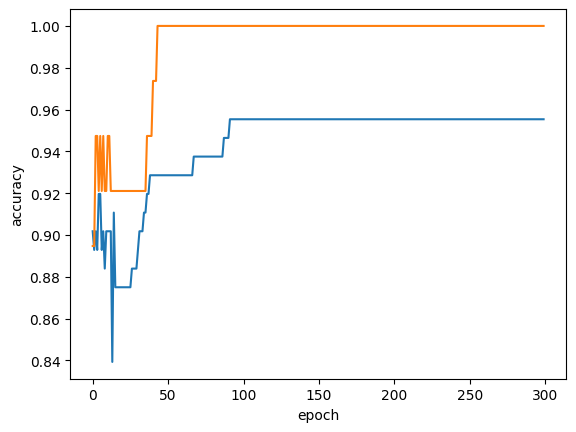

In [ ]:
#epoch에 따른 정확도 그래프 추출
import matplotlib.pyplot as plt

plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [ ]:
#최적화하기
sd = SGDClassifier(loss='hinge', max_iter=20, tol=None, random_state=42)
#두 그래프의 간극이 작은 지점은 40정도 이기 떄문에 epoch의 값을 40으로 둔다
sd.fit(train_scaled, train_target)

print(sd.score(train_scaled, train_target))
print(sd.score(test_scaled, test_target))

0.9375
1.0


In [ ]:
wine.info()
#평균을 넣어서 평균값을 냄
#데이터 수가 적을 떄 가능
#잘 모르겠다 할 떈 평균을 내서 결과를 내고, 데이터를 지워서 결과를 낸다

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


훈련세트 하나를 이용해서 경사를 낮춘다.
미니배치의 경우 훈련 세트의 샘플을 여러개 사용
배치 경사 하강법: 훈련에 모든 샘플을 사용한다.
손실함수: 어떤 문제에서 머신러닝 알고리즘이 얼마나 잘못됐는지 알려주는 함수
예측값과 정답을 곱한 값이 클 수록 손실이 낮다


